<div>
    <img src='../../pics/banner.PNG'/>
</div>
<div>
    <img width="10%" height="10%" src='../../pics/python-programming.png'/>
    <img src='../../pics/miw.PNG'/>
</div>
<div>
    <em>Author: Jeroen Boogaard</em>
</div>

<h1>Numpy</h1>

**Imports**

In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from scipy import ndimage
import os

**Gebruik de numpy methode <i>flip</i> voor het spiegelen van een image**

<h2>Opdracht 1</h2>
<ol>
    <li>Spiegel pImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>bImg</u></li>
    <li>Spiegel qImg over de hortizontale as en ken de resulterende afbeelding toe aan variabele <u>dImg</u></li>
    <li>Geef bImg en dImg naast elkaar weer op de lege plaatsen in het raster</li>    
</ol>

<class 'numpy.ndarray'>


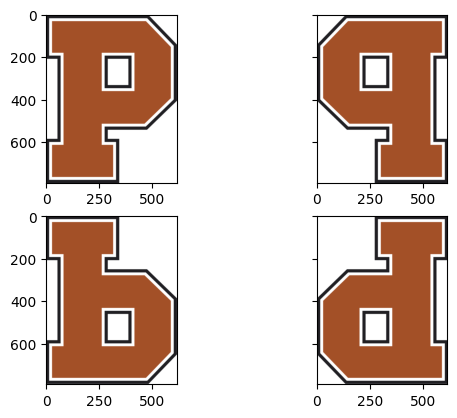

In [2]:
pImg = cv2.imread("../../pics/letter_p.png")
print(type(pImg))

# Maak een raster voor 4 images
fig, axs = plt.subplots(2,2 , sharey=True)
             
axs[0][0].imshow(pImg)

# Spiegel over de verticale as
qImg = np.flip(pImg, axis=1)
axs[0][1].imshow(qImg)

bImg = np.flip(pImg,axis = 0)
axs[1][0].imshow(bImg)
dImg = np.flip(bImg,axis = 1)
axs[1][1].imshow(dImg)

<h2>Opdracht 2</h2>

<h3>Gegeven</h3>

Planeet | Grootte to.v. de omvang van de Aarde
---|---
Jupiter | 1120%
Saturnus | 945%
Uranus | 400%
Neptunus | 388%
Aarde| 100%
Venus | 95%
Mars | 53%
Mercury | 33%

In [3]:
filename = "../../csv/planets.csv"

<h3>Gevraagd</h3>
<p>
Schaal voor elke (erkende) planeet uit ons zonnestelsel de bijbehorende image t.o.v. van de aarde. Het geschaalde plaatje moet groter zijn dan het plaatje van de aarde als de bijbehorende planeet groter is dan de aarde. Is de planeet kleiner dan de aarde dan moet het nieuwe plaatje kleiner zijn. Gebruik voor de schaalfactor het percentage. 
<br>Tip: Indien nodig kun je de images normaliseren door eerst het plaatje van de aarde naar de gete schalen.
</p>

<h3>Oplossing</h3>
<ol>
    <li>
        <strong>Open het bestand csv/planets.csv en voeg daar de kolom <i>image</i></strong>
    </li>
    <li>
        <strong>Importeer het csv-bestand en sla de data op in een dictionary</strong>
    </li>
    <li>
        <strong>Open een image uit van een item uit de dictionary</strong>
    </li>
    <li>
        <strong>Schaal de image m.b.v. een <i>numpy array</i></strong>
    </li>
    <li>
        <strong>Sla de geschaalde image op</strong>
    </li>
    <li>
        <strong>Schrijf een functie voor het schalen van een image</strong>
    </li>    
    <li>
        <strong>Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen</strong>
    </li>    
</ol>    

**Stap 2: Importeer het csv-bestand en sla de data op in een dictionary**

In [4]:
!pwd
import pandas as pd
filename = "../csv/planets.csv"
planetDataFrame = pd.read_csv(filename, header = 0, sep = ',')
print(type(planetDataFrame))
print(planetDataFrame)

/c/Users/Lenovo/MakeAIWork1/practica/week2
<class 'pandas.core.frame.DataFrame'>
      Name   Diameter          Mass   Inclination   Eccentricity  \
0  Mercury     4879.4   3.302×10^23       7.00400       0.205636   
1    Venus    12103.6   4.869×10^24       3.39471       0.006777   
2    Earth    12756.3   5.974×10^24       0.00005       0.016711   
3     Mars     6794.4   6.419×10^23       1.85061       0.093394   
4  Jupiter   142984.0   1.899×10^27       1.30530       0.048386   
5   Saturn   120536.0   5.688×10^26       2.48446       0.053862   
6   Uranus    51118.0   8.683×10^25       0.77400       0.047257   
7  Neptune    49572.0   1.024×10^26       1.76917       0.008590   

    Semi_majorAxis   SurfaceGravity   OrbitalPeriod   SiderealRotation  \
0         0.387099             3.70           0.241          58.650000   
1         0.723336             8.87           0.615         243.018700   
2         1.000003             9.78           1.000           0.997271   
3         

**Stap 3: Open een image uit van een item uit de dictionary**

In [5]:
!pwd
from PIL import Image
img = Image.open('../pics/earth.jpg')
type(img)
img.show()



/c/Users/Lenovo/MakeAIWork1/practica/week2


**Stap 4: Schaal de image m.b.v. een numpy array**

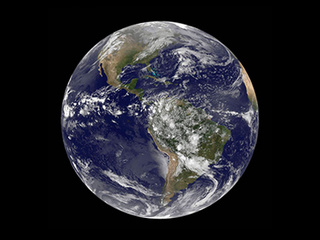

In [6]:
    array = np.array(img)    
    display(img)
    
    scaleFactor = 0.5
    scaleArray = ndimage.zoom(array, (scaleFactor,scaleFactor, 1))
    imgScaled = Image.fromarray(scaleArray)
    #imgScaled.show()
    # display(imgScaled)

**Stap 5: Sla de geschaalde image op**

In [7]:

    
    
    
    
    
    imgScaled.save(img.filename.replace(".jpg","_scaled.jpg"))

**Stap 6: Schrijf een functie voor het schalen van een image**

In [8]:


# Output: scaleImg
def scaleImage(planetName, scale):
    
   
    
    # Open img
    img = Image.open(planetName)
    type(img)
    
    # Convert to Numpy Array
    array = np.array(img)   
    
    scaleFactor = scale
    scaleArray = ndimage.zoom(array, (scaleFactor,scaleFactor, 1))
    imgScaled = Image.fromarray(scaleArray)
#         imgScaled.show()
    imgScaled.save(img.filename.replace(".jpg","_scaled.jpg"))
#scaleImage('../pics/earth.jpg',2)
#display(img)

**Stap 7: Maak een loop waarbij voor elke planeet een geschaalde image wordt gemaakt en opgelagen**

</ol>

In [9]:
from os import listdir
from os.path import isfile, join


def scaleImage(planetName, scale):
    
   
    
    # Open img
    img = Image.open(planetName)
    type(img)
    
    # Convert to Numpy Array
    array = np.array(img)   
    
    scaleFactor = scale
    scaleArray = ndimage.zoom(array, (scaleFactor,scaleFactor, 1))
    imgScaled = Image.fromarray(scaleArray)
#         imgScaled.show()
    imgScaled.save(img.filename.replace(".jpg","_scaled.jpg"))
    
planetNames=("../pics/mercury.jpg",
             "../pics/venus.jpg","../pics/earth.jpg","../pics/mars.jpg","../pics/jupiter.jpg","../pics/saturn.jpg","../pics/uranus.jpg","../pics/neptune.jpg")

for i in range(len(planetDataFrame[" Diameter"])):
    scales = planetDataFrame[" Diameter"][i]/planetDataFrame[" Diameter"][2]
    scaleImage(planetNames[i],scales)
        
    
   

earth.jpg
0.38250903475145615
0.9488331255928444
1.0
0.5326309353025563
11.208892860782516
9.449134937246694
4.0072748367473325
3.886079819383364
earth_scaled.jpg
0.38250903475145615
0.9488331255928444
1.0
0.5326309353025563
11.208892860782516
9.449134937246694


FileNotFoundError: [Errno 2] No such file or directory: '../pics\\earth_scaled.jpg'

In [ ]:
from pathlib import Path
images = Path("C:/Users/Lenovo/MakeAIWork1/practica/pics").glob("*.jpg")

In [ ]:
!pwd